In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from os.path import join
from tqdm import tqdm_notebook

in the pillar experiments, the choice of flow stress is also not clear (no universal definition). 
in the experiments of Greer, the total loading strain is up to 25%, they choose stress at 10% loading strain 
as the flow stress based on the argument that no clear hardening is observed after this loading strain. 
based on the data we already have, I propose a method to calculate the flow stress. 
we also argue that we already reached a flow regime, as shown by stress strain curves in figure 1 in the manuscript
so I define the flow stress in the following way: 
take the stress value of the last data point, 
then find all strain values that have the same stress value, 
find the minum strain, then the average stress from this strain point to 
the last data point is defined as flow stress. 
If the stress at the last data point is too high (cannot find other strain values that have the same stress), 
then take a data point several increments prior to the last data point, then repeat the above process.
it is better to have at least two strain values, i.e., we have two periods. 

In [4]:
import glob,os
import numpy as np
import matplotlib.pyplot as plt

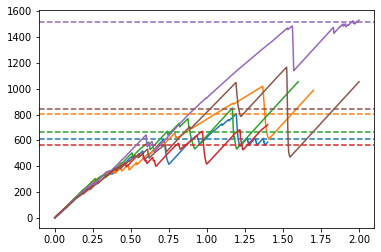

In [5]:
def flow_stress(x):
    #x is the stress
    target_stress = x[-1]
    zero=1e-1
    indexes = [i for i,ix in enumerate(x) if abs(ix-target_stress)<zero]
    j=2
    while (len(indexes)<4):  
        target_stress = x[-j]
        indexes = [i for i,ix in enumerate(x) if abs(ix-target_stress)<zero]
        j+=1
    index=np.min(indexes)
    flow_stress = np.mean(x[index:-j])
    return flow_stress,index

sigmaf = []
fig,ax = plt.subplots()
diameter = 400
strain_rate = 1e5
path = f'D{diameter:d}/' + f'{strain_rate:1.0E}'.replace('+0', '') 
files = glob.glob(join(path, '*.txt'))
for i, file in enumerate(files):
    a = np.loadtxt(file)
    c = 'C' + str(i)
    ax.plot(a[:,0],a[:,1], c=c)
    sigma_flow,index = flow_stress(a[:,1])
    ax.axhline(sigma_flow, c=c, ls='--')
    sigmaf.append([strain_rate,sigma_flow])
np.savetxt('flow_stress-D'+str(diameter)+'-rate-'+f'{strain_rate:1.0E}'.replace('+0', '')+'.txt',sigmaf)


replot of figure 5 in the manuscript. 

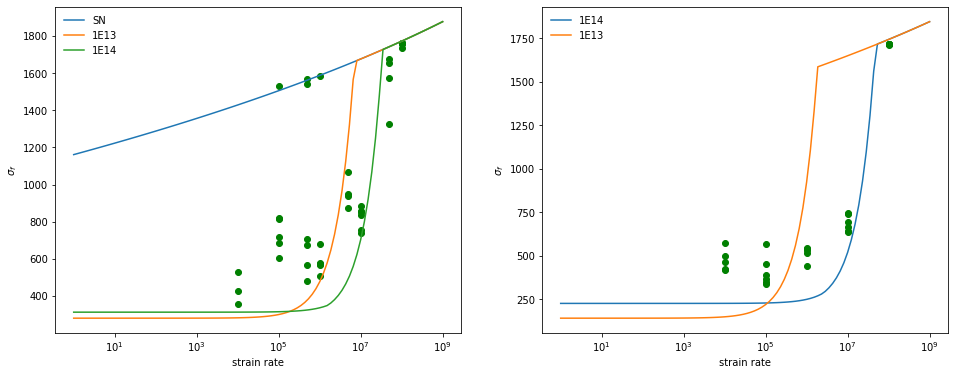

In [4]:
fig, ax = plt.subplots(ncols=2,figsize=(16,6))
files_a = glob.glob('Figure5/flow_stress-D400*')
for file in files_a:
    a = np.loadtxt(file)
    ax[0].plot(a[:,0],a[:,1],'o',color='green')
analytical = glob.glob('Figure5/D400-Analyticalmodel/*')
for ana in analytical:
    a = np.loadtxt(ana)
    label = ana.split('Analyticalmodel/D400-')[1].split('.txt')[0]
    ax[0].plot(a[:,0],a[:,1],'-',label=label)
ax[0].set_xscale('log')
ax[0].set_xlabel('strain rate')
ax[0].set_ylabel('$\sigma_{f}$')
ax[0].legend(loc='upper left', frameon=False)


files_b = glob.glob('Figure5/flow_stress-D800*')
for file in files_b:
    a = np.loadtxt(file)
    ax[1].plot(a[:,0],a[:,1],'o',color='green')
analytical = glob.glob('Figure5/D800-Analyticalmodel/*')
for ana in analytical:
    a = np.loadtxt(ana)
    label = ana.split('Analyticalmodel/D800-')[1].split('.txt')[0]
    ax[1].plot(a[:,0],a[:,1],'-',label=label)
ax[1].set_xscale('log')
ax[1].set_xlabel('strain rate')
ax[1].set_ylabel('$\sigma_{f}$')
ax[1].legend(loc='upper left', frameon=False)


replot of figure 6 in the manuscript

In [9]:
import pandas as pd
param = {'names': ['strain_rate', 'flow_stress'], 'sep':'\t', 
         'header': None, 'skiprows': 0}
paramexp = {'names': ['strain_rate', 'flow_stress', 'errorbar'], 'sep':'\t', 
         'header': None, 'skiprows': 0}

data1e14 = {
    '75nm': pd.read_csv('Figure6/Analytical_model/D75-Rou1E14.txt', **param),
    '125nm': pd.read_csv('Figure6/Analytical_model/D125-Rou1E14.txt', **param),
    '150nm': pd.read_csv('Figure6/Analytical_model/D150-Rou1E14.txt', **param),
    '250nm': pd.read_csv('Figure6/Analytical_model/D250-RouE14.txt', **param),
}
data5e13 = {
    '75nm': pd.read_csv('Figure6/Analytical_model/D75-Rou5E13.txt', **param),
    '125nm': pd.read_csv('Figure6/Analytical_model/D125-Rou5E13.txt', **param),
    '150nm': pd.read_csv('Figure6/Analytical_model/D150-Rou5E13.txt', **param),
    '250nm': pd.read_csv('Figure6/Analytical_model/D250-Rou5E13.txt', **param),
}

dataexp = {
    '75nm': pd.read_csv('Figure6/Experiment/D75.txt', **paramexp),
    '125nm': pd.read_csv('Figure6/Experiment/D125.txt', **paramexp),
    '150nm': pd.read_csv('Figure6/Experiment/D150.txt', **paramexp),
    '250nm': pd.read_csv('Figure6/Experiment/D250.txt', **paramexp),
}

Here, we only plot the average stress for the experimental data. This is the reason why the histogram for the exp. data (alpha=0.4) looks so sparse.

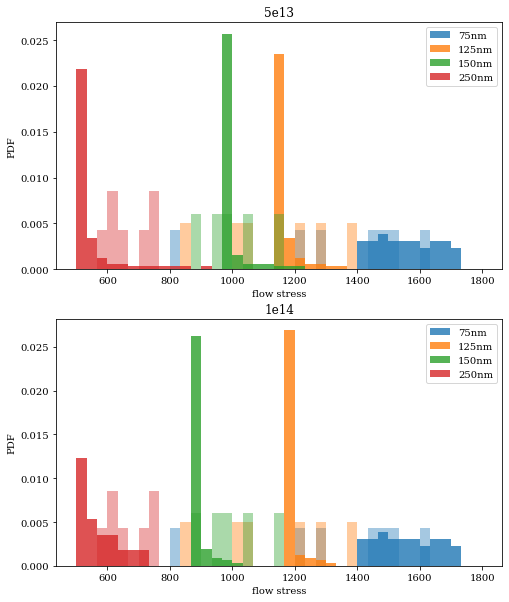

In [10]:
fig, ax = plt.subplots(nrows=2, figsize=(8, 10))
colors = [f'C{i}' for i in range(4)]
for i, (keys1, keys2, keys3) in enumerate(zip(data5e13.keys(), data1e14.keys(), dataexp.keys())):
    ax[0].hist(data5e13[keys1].flow_stress, bins=np.linspace(500, 1800, 40), alpha=0.8, 
              density=True, label=keys1, color=colors[i]);
    ax[0].hist(dataexp[keys3].flow_stress, bins=np.linspace(500, 1800, 40),  
              density=True, label='', color=colors[i], alpha=0.4);

    ax[1].hist(data1e14[keys2].flow_stress, bins=np.linspace(500, 1800, 40), alpha=0.8, 
              density=True, label=keys2, color=colors[i]);
    ax[1].hist(dataexp[keys3].flow_stress, bins=np.linspace(500, 1800, 40),  
              density=True, label='', color=colors[i], alpha=0.4);   
    
ax[0].set_title('5e13')
ax[1].set_title('1e14')
for a in ax.flatten():
    a.set(xlabel="flow stress", ylabel="PDF")
    a.legend();


# add normal distributed random data according to the errorbar

75nm
125nm
150nm
250nm


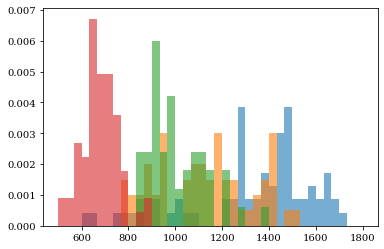

In [11]:
fig, ax = plt.subplots()
for i, keys3 in enumerate(dataexp.keys()):
    print(keys3)
    stress = []
    for n in range(len(dataexp[keys3])):
        stress.append(np.random.normal(loc=dataexp[keys3].loc[n].flow_stress, 
                                  scale=dataexp[keys3].loc[n].errorbar,
                                  size=10))
    stress = np.array(stress).ravel()
    ax.hist(stress, bins=np.linspace(500, 1800, 40), alpha=0.6, density=True);

figure presented in the manuscript 

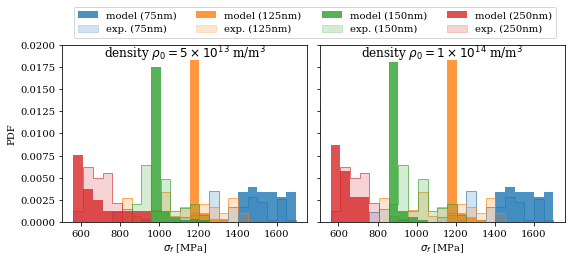

In [12]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(9, 3.5), gridspec_kw={'top': 0.83, 'wspace': 0.05})
plt.rcParams['font.family'] = 'serif'
colors = [f'C{i}' for i in range(4)]
bw_sim = 40
bw_exp = 12
bins=np.linspace(560, 1700, 24)
for i, (keys1, keys2, keys3) in enumerate(zip(data5e13.keys(), data1e14.keys(), dataexp.keys())):
    ax[0].hist(data5e13[keys1].flow_stress, bins=bins, alpha=0.8, density=True, label="model (" + keys1 + ")", color=colors[i]);
    ax[1].hist(data1e14[keys2].flow_stress, bins=bins, alpha=0.8, density=True, label="model (" + keys2 + ")", color=colors[i]);


    # get some extra data points accorind to the error
    exp_stress = np.empty(0)
    for n, row in dataexp[keys3].iterrows():
        exp_stress = np.append(exp_stress, np.random.normal(loc=row.flow_stress, 
                                                            scale=row.errorbar/2, 
                                                            size=10))
  
    ax[0].hist(exp_stress, bins=bins, label="exp. (" + keys1 + ")", histtype="step", fill=True, alpha=0.2, color=colors[i], density=True);
    ax[1].hist(exp_stress, bins=bins, label="exp. (" + keys1 + ")", histtype="step", fill=True, alpha=0.2, color=colors[i], density=True);
    ax[0].hist(exp_stress, bins=bins, label='',     histtype="step", fill=False, alpha=0.5, color=colors[i], density=True)
    ax[1].hist(exp_stress, bins=bins, label='',     histtype="step", fill=False, alpha=0.5, color=colors[i], density=True)
    
ax[0].set_title(r'density $\rho_0=5\times 10^{13}$ m/m$^3$')
ax[0].title.set_position((0.5, 0.89))
ax[1].set_title(r'density $\rho_0=1\times 10^{14}$ m/m$^3$')
ax[1].title.set_position((0.5, 0.89))
ax[0].set(xlabel=r"$\sigma_f$ [MPa]", ylabel="PDF", ylim=(0, 0.02))
ax[0].legend(ncol=4, loc='lower left', bbox_to_anchor= (0.026, 1.01));
ax[1].set(xlabel=r"$\sigma_f$ [MPa]",  ylim=(0, 0.02))
    
plt.savefig("flow_stress_hist.png", dpi=300)